# IMPORT LIBRARY & DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/hesyandi/Portofolio/master/3_Data_Visualization/Datasets/Ritz_Jager_Data.csv')

In [4]:
df.head(5)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [5]:
df['arrival_date_day_of_month'].count()

119390

In [6]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017], dtype=int64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

#DATA VISUALIZATION

## JAWABAN 1

In [8]:
#Step 1, Melakukan filter booking yang tidak dicancel
booking = df[df['is_canceled']==0]
booking.head(5)

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [9]:
#Step 2, Melihat jumlah booking selesai berdasarkan tanggal kedatangan 
visitor_country = pd.pivot_table(booking, index='country_origin', values='arrival_date_day_of_month', aggfunc='count').\
    rename(columns={'arrival_date_day_of_month':'number_of_completed_bookings'})
visitor_country

,number_of_completed_bookings
country_origin,
ABW,2
AGO,157
AIA,1
ALB,10
AND,2
...,...
VEN,14
VNM,6
ZAF,49


In [10]:
#Step 3, Lima negara dengan booking selesai terbanyak
visitor_country_sort_des = visitor_country.\
    sort_values(by='number_of_completed_bookings', ascending=False).reset_index().head(5)
visitor_country_sort_des

,country_origin,number_of_completed_bookings
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069


<AxesSubplot:title={'center':'Top 5 countries with highest completed booking'}, xlabel='Country'>

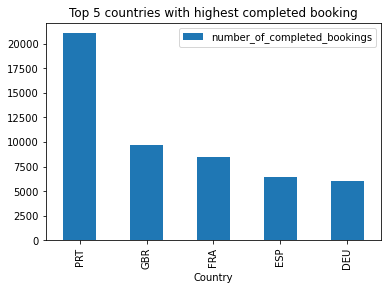

In [11]:
#Pandas - Bar Chart
visitor_country_sort_des.plot(x='country_origin', y='number_of_completed_bookings', kind='bar', xlabel='Country', title='Top 5 countries with highest completed booking')

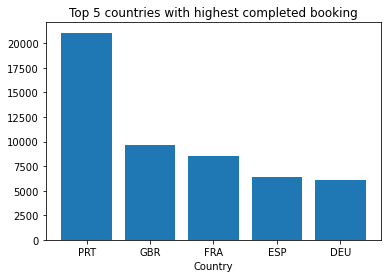

In [12]:
#Matplotlib - Bar Chart
plt.bar(visitor_country_sort_des['country_origin'], visitor_country_sort_des['number_of_completed_bookings'])
plt.xlabel('Country')
plt.title('Top 5 countries with highest completed booking')
plt.show()

In [13]:
#Seaborn- Bar Chart

In [14]:
#Step 4, Lima negara dengan booking selesai paling sedikit
visitor_country_sort_asc = visitor_country.\
    sort_values(by='number_of_completed_bookings', ascending=True).reset_index().head(5)
visitor_country_sort_asc

,country_origin,number_of_completed_bookings
0,PLW,1
1,MDG,1
2,MLI,1
3,MMR,1
4,MRT,1


<AxesSubplot:title={'center':'Top 5 countries with lowest completed booking'}, xlabel='Country'>

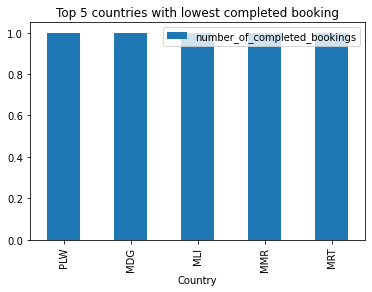

In [15]:
#Pandas - Bar Chart
visitor_country_sort_asc.plot(x='country_origin', y='number_of_completed_bookings', kind='bar', xlabel='Country', title='Top 5 countries with lowest completed booking')

## JAWABAN 2

In [16]:
#Step 1, Melihat booking yang tidak dicancel berdasarkan market segment. 
booking_segment = pd.pivot_table(booking, index='market_segment', values='arrival_date_day_of_month', aggfunc='count').\
    rename(columns={'arrival_date_day_of_month':'number_of_completed_bookings'})
booking_segment_sort = booking_segment.sort_values(by='number_of_completed_bookings', ascending=False).reset_index()
booking_segment_sort

,market_segment,number_of_completed_bookings
0,Online TA,35738
1,Offline TA/TO,15908
2,Direct,10672
3,Groups,7714
4,Corporate,4303
5,Complementary,646
6,Aviation,185


<AxesSubplot:title={'center':'number of booking per market segment'}, xlabel='market_segment'>

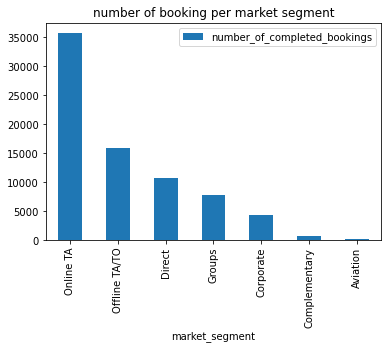

In [17]:
#Step 2, membuat bar chart
booking_segment_sort.plot(x='market_segment', y='number_of_completed_bookings', kind='bar', title='number of booking per market segment')

## JAWABAN 3

In [18]:
#Step 1, melakukan filter booking yang dicancel
booking_cancel = df[df['is_canceled']==1]
booking_cancel.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,23/6/2015
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,11/5/2015
32,Resort Hotel,1,96,2015,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,29/5/2015


In [19]:
#Step 2, menghitung booking cancel berdasarkan tipe kamar
booking_cancel_room = pd.pivot_table(booking_cancel, index='reserved_room_type', values='is_canceled', aggfunc='count').\
    sort_values(by='is_canceled', ascending=False).reset_index().\
    rename(columns={'reserved_room_type':'room_type', 'is_canceled':'number_canceled_booking'})
booking_cancel_room.head(10)

,room_type,number_canceled_booking
0,A,33630
1,D,6102
2,E,1914
3,F,880
4,G,763
5,B,368
6,C,308
7,H,245
8,P,12
9,L,2


<AxesSubplot:title={'center':'number of canceled booking by room type'}, xlabel='room_type'>

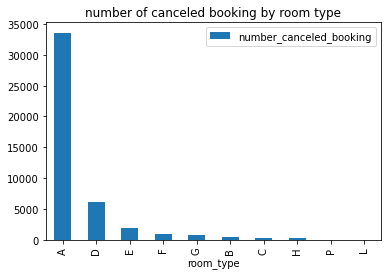

In [20]:
#Step 3, bar chart jumlah booking cancel berdasarkan tipe kamar
booking_cancel_room.plot(x='room_type', y='number_canceled_booking', kind='bar', title='number of canceled booking by room type')

## JAWABAN 4

In [21]:
#Step 1, mengetahui jumlah booking cancel berdasarkan bulan
booking_cancel_month = pd.pivot_table(booking_cancel, index='arrival_date_month', values='is_canceled', aggfunc='count').\
    sort_values(by='is_canceled', ascending=False).reset_index().\
    rename(columns={'is_canceled':'number_canceled_booking','arrival_date_month':'month'})
booking_cancel_month

,month,number_canceled_booking
0,August,5239
1,July,4742
2,May,4677
3,June,4535
4,April,4524
5,October,4246
6,September,4116
7,March,3149
8,February,2696
9,December,2371


<AxesSubplot:title={'center':'number of canceled booking per month'}, xlabel='month'>

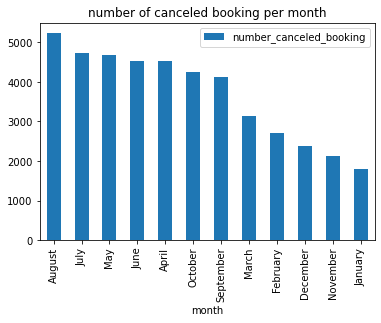

In [22]:
#Step 2, bar chart visualisasi
booking_cancel_month.plot(x='month', y='number_canceled_booking', kind='bar', title='number of canceled booking per month')